In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('GlobalTemperatures.csv')
df['dt'] = pd.to_datetime(df['dt'])

# Validasi Interpolasi

In [4]:
# Ambil data tahun 2010 sebagai kelinci percobaan
df_2010 = df[df['dt'].dt.year == 2010].sort_values('dt')
x_bulan = np.arange(1, 13) # Bulan 1 - 12
y_asli = df_2010['LandAverageTemperature'].values

# Sisakan bulan 1, 4, 7, 10
idx_sampel = [0, 3, 6, 9]
x_sampel = x_bulan[idx_sampel]
y_sampel = y_asli[idx_sampel]

# Membuat Fungsi Interpolasi
f_linear = interp1d(x_sampel, y_sampel, kind='linear')
f_cubic = interp1d(x_sampel, y_sampel, kind='cubic') # Spline

# Hitung Error (RMSE) hanya pada rentang interpolasi (Bulan 1-10)
mask_eval = (x_bulan >= 1) & (x_bulan <= 10)
rmse_linear = np.sqrt(mean_squared_error(y_asli[mask_eval], f_linear(x_bulan[mask_eval])))
rmse_cubic = np.sqrt(mean_squared_error(y_asli[mask_eval], f_cubic(x_bulan[mask_eval])))

print(f"Error (RMSE) Linear: {rmse_linear:.4f}")
print(f"Error (RMSE) Cubic : {rmse_cubic:.4f}")

#Error Cubic lebih kecil

Error (RMSE) Linear: 0.8092
Error (RMSE) Cubic : 0.4694


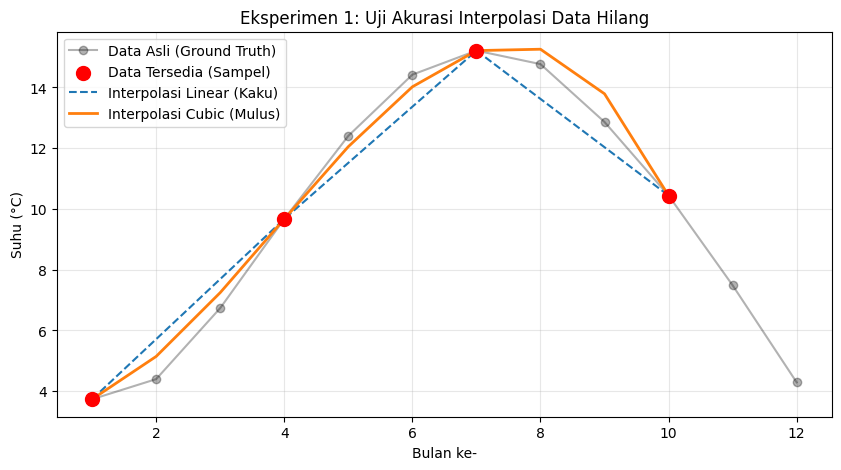

In [5]:
# PLOT GRAFIK 1
plt.figure(figsize=(10, 5))
plt.plot(x_bulan, y_asli, 'o-', color='black', alpha=0.3, label='Data Asli (Ground Truth)')
plt.scatter(x_sampel, y_sampel, color='red', s=100, zorder=5, label='Data Tersedia (Sampel)')
plt.plot(x_bulan[mask_eval], f_linear(x_bulan[mask_eval]), '--', label='Interpolasi Linear (Kaku)')
plt.plot(x_bulan[mask_eval], f_cubic(x_bulan[mask_eval]), '-', linewidth=2, label='Interpolasi Cubic (Mulus)')
plt.title('Eksperimen 1: Uji Akurasi Interpolasi Data Hilang')
plt.xlabel('Bulan ke-')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

 # Curve Fitting dan Prediksi

Akurasi Model Linear (R2): 0.7189
Akurasi Model Kuadratik (R2): 0.7769
Prediksi Suhu 2030: 9.96 °C
Prediksi Suhu 2050: 10.51 °C


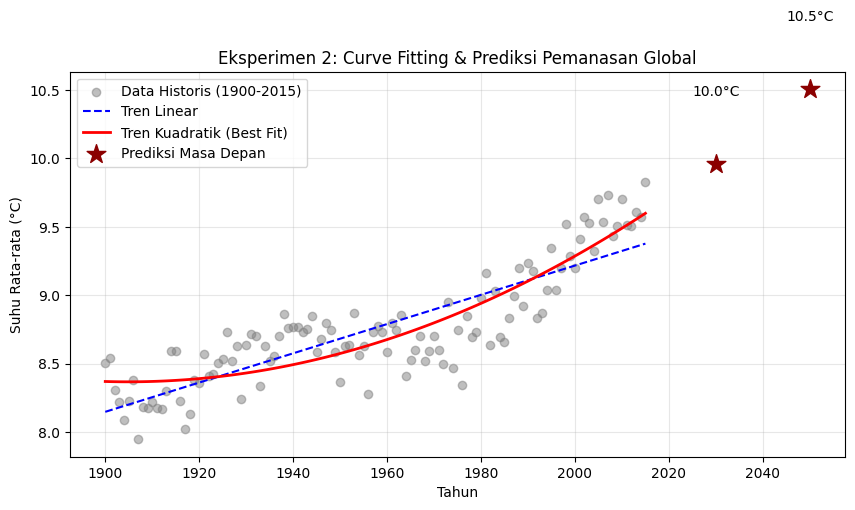

In [6]:
# Ambil data tahunan 1900 - 2015
df_tahun = df.groupby(df['dt'].dt.year)['LandAverageTemperature'].mean().reset_index()
df_tahun = df_tahun[df_tahun['dt'] >= 1900]

x_thn = df_tahun['dt'].values
y_suhu = df_tahun['LandAverageTemperature'].values

# Normalisasi X (Agar perhitungan dimulai dari 0, bukan 1900)
x_fit = x_thn - x_thn.min()

# Model A: Linear (Asumsi kenaikan tetap)
z_lin = np.polyfit(x_fit, y_suhu, 1)
p_lin = np.poly1d(z_lin)
r2_lin = r2_score(y_suhu, p_lin(x_fit))

# Model B: Kuadratik (Asumsi kenaikan makin cepat)
z_poly = np.polyfit(x_fit, y_suhu, 2)
p_poly = np.poly1d(z_poly)
r2_poly = r2_score(y_suhu, p_poly(x_fit))

print(f"Akurasi Model Linear (R2): {r2_lin:.4f}")
print(f"Akurasi Model Kuadratik (R2): {r2_poly:.4f}")

# Prediksi Masa Depan
thn_pred = np.array([2030, 2050])
x_pred = thn_pred - 1900
suhu_pred = p_poly(x_pred)

print(f"Prediksi Suhu 2030: {suhu_pred[0]:.2f} °C")
print(f"Prediksi Suhu 2050: {suhu_pred[1]:.2f} °C")

# PLOT GRAFIK 2
plt.figure(figsize=(10, 5))
plt.scatter(x_thn, y_suhu, color='gray', alpha=0.5, label='Data Historis (1900-2015)')
plt.plot(x_thn, p_lin(x_fit), 'b--', label='Tren Linear')
plt.plot(x_thn, p_poly(x_fit), 'r-', linewidth=2, label='Tren Kuadratik (Best Fit)')
plt.scatter(thn_pred, suhu_pred, color='darkred', marker='*', s=200, label='Prediksi Masa Depan', zorder=5)

# Tambahkan label angka di grafik
for i, txt in enumerate(suhu_pred):
    plt.annotate(f"{txt:.1f}°C", (thn_pred[i], suhu_pred[i]), xytext=(thn_pred[i]-5, suhu_pred[i]+0.5))

plt.title('Eksperimen 2: Curve Fitting & Prediksi Pemanasan Global')
plt.xlabel('Tahun')
plt.ylabel('Suhu Rata-rata (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()